## Выбирающий вариант

In [ ]:
surname = "Джабри"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  1
Задача № 1, шаг 11 - вариант:  2
задача № 2 - вариант:  4


# Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Governance Indicators, WGI)

## Загрузить набор данных

In [ ]:
from google.colab import files

# Загрузить файл данных
uploaded = files.upload()

# Сохраните загруженный файл на диск
for filename in uploaded.keys():
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

## 1. Загрузите данные в DataFrame

---



In [156]:
# Теперь мы можем загрузить данные в DataFrame
import pandas as pd

# загруженный файл в формате Excel (xlsx)
regions = pd.read_excel('/content/regions.xlsx')
#загруженный файл имеет формат sta
#wgidataset = pd.read_stata('/content/wgidataset.dta')
df = pd.read_excel("/content/wgidataset.xlsx", 'ControlofCorruption', skiprows=14,)
# Split the DataFrame
part1 = df.iloc[:, :2]  # First two columns
part2 = df.iloc[:, 2:]  # Rest of the columns

column_groups = [part2.columns[i:i+6] for i in range(0, len(part2.columns), 6)]
separate_datasets = []
for group in column_groups:
    separate_datasets.append(df[group])
# Initialize an empty list to store concatenated datasets
concatenated_datasets = []

# Concatenate part1 with each dataset separately
for dataset in separate_datasets:
    concatenated_dataset = pd.concat([part1, dataset], axis=1)
    concatenated_datasets.append(concatenated_dataset)
new_column_names = ['Estimate', 'StdErr', 'NumSrc', 'Rank', 'Lower', 'Upper']
# Loop through each dataset
for dataset in concatenated_datasets:
    # Identify the last 5 columns
    dataset.columns = list(dataset.columns[:-6]) + new_column_names



In [157]:
import pandas as pd

# Example data
years = [1996, 1998, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Create DataFrames with unique identifiers (e.g., index)
dfs = [df.assign(Year=year) for year, df in zip(years, concatenated_datasets)]

# Concatenate DataFrames
Final_dataset = pd.concat(dfs, ignore_index=True)

Final_dataset.head()

,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Year
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,1996
1,Andorra,ADO,1.318143,0.480889,1.0,87.096771,72.043015,96.774193,1996
2,Afghanistan,AFG,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,1996
3,Angola,AGO,-1.167702,0.262077,4.0,9.677420,0.537634,27.419355,1996
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,1996


In [158]:
# Now you can work with the data DataFrame Regions dataset
regions.head()

,Country,Code,Region
0,Afghanistan,AFG,AP
1,Albania,ALB,ECA
2,Algeria,DZA,MENA
3,Angola,AGO,SSA
4,Argentina,ARG,AME


## 2. Отсортируйте данные по убыванию индекса Data Frame

In [159]:
# Отсортируйте данные по показателю индекса WGI в порядке возрастания, чтобы получить ранги
sorted_dataset =   Final_dataset.sort_values(by='Rank', ascending=False)
sorted_dataset.head()

,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Year
4548,Denmark,DNK,2.236469,0.149797,10.0,100.0,95.714287,100.0,2020
1980,Denmark,DNK,2.376409,0.182742,8.0,100.0,96.116508,100.0,2008
2194,Denmark,DNK,2.435494,0.167893,9.0,100.0,97.607658,100.0,2009
2408,Denmark,DNK,2.352359,0.153291,10.0,100.0,97.619049,100.0,2010
4762,Denmark,DNK,2.333753,0.162209,10.0,100.0,97.142860,100.0,2021


## 3. Отобразите данные по индексу WGI за 2021 год в виде горизонтального столбчатого графика (rank).

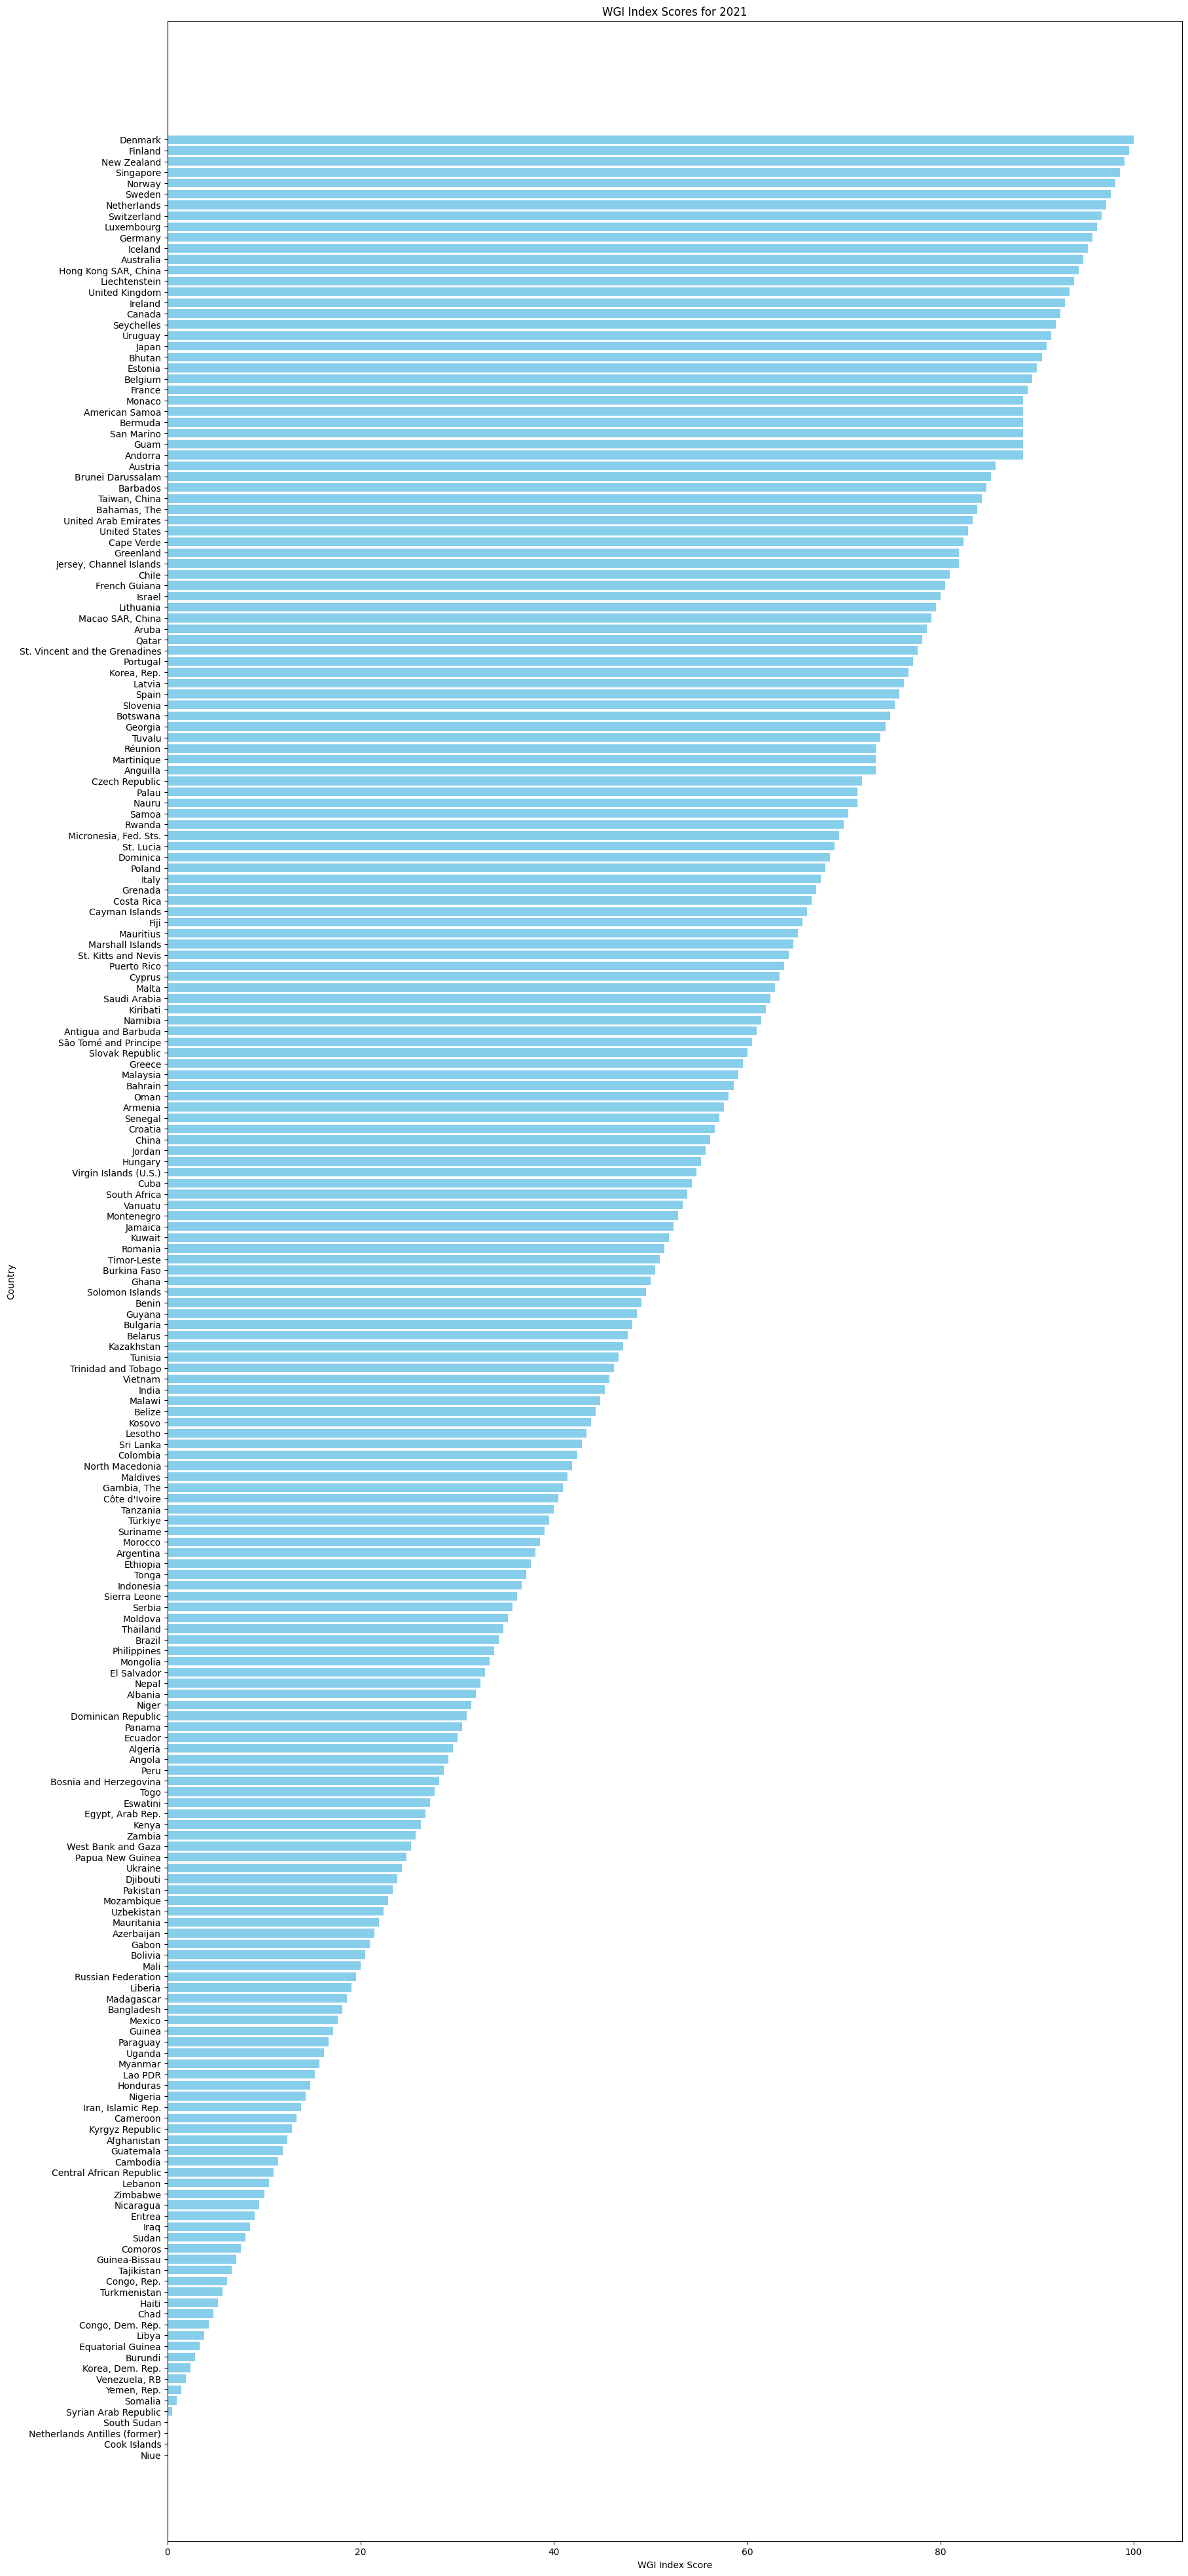

In [90]:
import matplotlib.pyplot as plt

# Отфильтруйте набор данных, чтобы включить в него данные только за 2021 год
df_2021 = sorted_dataset[sorted_dataset['Year'] == 2021]


# Построение
plt.figure(figsize=(20, 50))
plt.barh(df_2021['Country/Territory'], df_2021['Rank'], color='skyblue')
plt.xlabel('WGI Index Score')
plt.ylabel('Country')
plt.title('WGI Index Scores for 2021')
plt.gca().invert_yaxis()  # Инвертируйте ось y, чтобы получить самый высокий ранг сверху
plt.show()


## 4. Создайте фрейм данных из исходного фрейма для Азиатско-Тихоокеанского региона

In [160]:
# 1 Отфильтруйте фрейм данных, чтобы сохранить только те строки,
# в которых значение в 'column_name' соответствует выбранному значению
merged_df = pd.merge(regions, Final_dataset, on='Code')
df_ap_region = merged_df[merged_df['Region'] == 'AP']
# # Теперь наш набор данных содержит только строки из набора данных wgi,
# которые относятся только к странам Азиатско-Тихоокеанского региона
df_ap_region.head()

,Country,Code,Region,Country/Territory,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Year
0,Afghanistan,AFG,AP,Afghanistan,-1.291705,0.340507,2.0,4.301075,0.0,27.419355,1996
1,Afghanistan,AFG,AP,Afghanistan,-1.176012,0.324013,2.0,8.021390,0.0,33.689838,1998
2,Afghanistan,AFG,AP,Afghanistan,-1.271724,0.346906,2.0,4.787234,0.0,30.851065,2000
3,Afghanistan,AFG,AP,Afghanistan,-1.251137,0.352838,2.0,4.761905,0.0,32.804234,2002
4,Afghanistan,AFG,AP,Afghanistan,-1.344180,0.270215,3.0,4.761905,0.0,19.047619,2003


## 5. Выведите данные DataFrame'a

## 6. Постройте графики индекса WGI за 1996-2021 годы для стран Азиатско-Тихоокеанского региона (оценка).

In [166]:
# создать DF с 1996 по 2021 год
df_1996_2021 = df_ap_region[['Country/Territory',"Year", "Estimate","Rank"]]
df_1996_2021 = df_1996_2021[df_1996_2021["Year"] != 2022]
df_1996_2021

,Country/Territory,Year,Estimate,Rank
0,Afghanistan,1996,-1.291705,4.301075
1,Afghanistan,1998,-1.176012,8.021390
2,Afghanistan,2000,-1.271724,4.787234
3,Afghanistan,2002,-1.251137,4.761905
4,Afghanistan,2003,-1.344180,4.761905
...,...,...,...,...
4170,Vietnam,2017,-0.628040,30.476191
4171,Vietnam,2018,-0.511549,35.238094
4172,Vietnam,2019,-0.545818,32.857143
4173,Vietnam,2020,-0.373947,41.428570


In [109]:

# Pivot the data frame
pivoted_df = df_1996_2021.pivot_table(columns='Country/Territory', index='Year', values='Estimate')

# Rename the columns
pivoted_df.columns = [f'Estimate.{col}' for col in pivoted_df.columns]

pivoted_df.head()


,Estimate.Afghanistan,Estimate.Australia,Estimate.Bangladesh,Estimate.Bhutan,Estimate.Cambodia,Estimate.China,Estimate.Fiji,"Estimate.Hong Kong SAR, China",Estimate.India,Estimate.Indonesia,...,Estimate.Pakistan,Estimate.Papua New Guinea,Estimate.Philippines,Estimate.Singapore,Estimate.Solomon Islands,Estimate.Sri Lanka,"Estimate.Taiwan, China",Estimate.Thailand,Estimate.Vanuatu,Estimate.Vietnam
Year,,,,,,,,,,,,,,,,,,,,,
1996,-1.291705,1.877356,-0.969682,0.942838,-1.019842,-0.271190,0.659303,1.444894,-0.381090,-0.864106,...,-1.220030,-0.433467,-0.358872,2.107434,0.340782,-0.056539,0.580821,-0.361192,0.216309,-0.489799
1998,-1.176012,1.798130,-0.773011,0.883641,-0.988312,-0.353955,0.663798,1.303382,-0.258727,-1.160077,...,-1.080915,-0.698878,-0.381950,2.057286,0.361923,-0.083365,0.583798,-0.141036,0.238910,-0.491154
2000,-1.271724,1.862088,-1.212083,0.574340,-0.967183,-0.208549,0.630552,1.292820,-0.403302,-0.908694,...,-0.894910,-0.786501,-0.527594,2.139873,0.177562,-0.199229,0.696333,-0.230174,0.227800,-0.584863
2002,-1.251137,1.761436,-1.449087,0.449922,-0.990784,-0.557898,0.610876,1.666942,-0.555382,-1.137303,...,-0.955986,-0.947748,-0.538532,2.262734,0.182450,-0.216593,0.619227,-0.338848,0.230140,-0.560991
2003,-1.344180,1.895287,-1.541721,1.087011,-0.989836,-0.395265,0.276082,1.800160,-0.456321,-0.979824,...,-0.804457,-0.813448,-0.635372,2.169168,0.214312,-0.272020,0.814145,-0.196024,0.262945,-0.490873


<Axes: title={'center': 'WGI за 1996-2022 Asia Pacific estimate'}, xlabel='Year'>

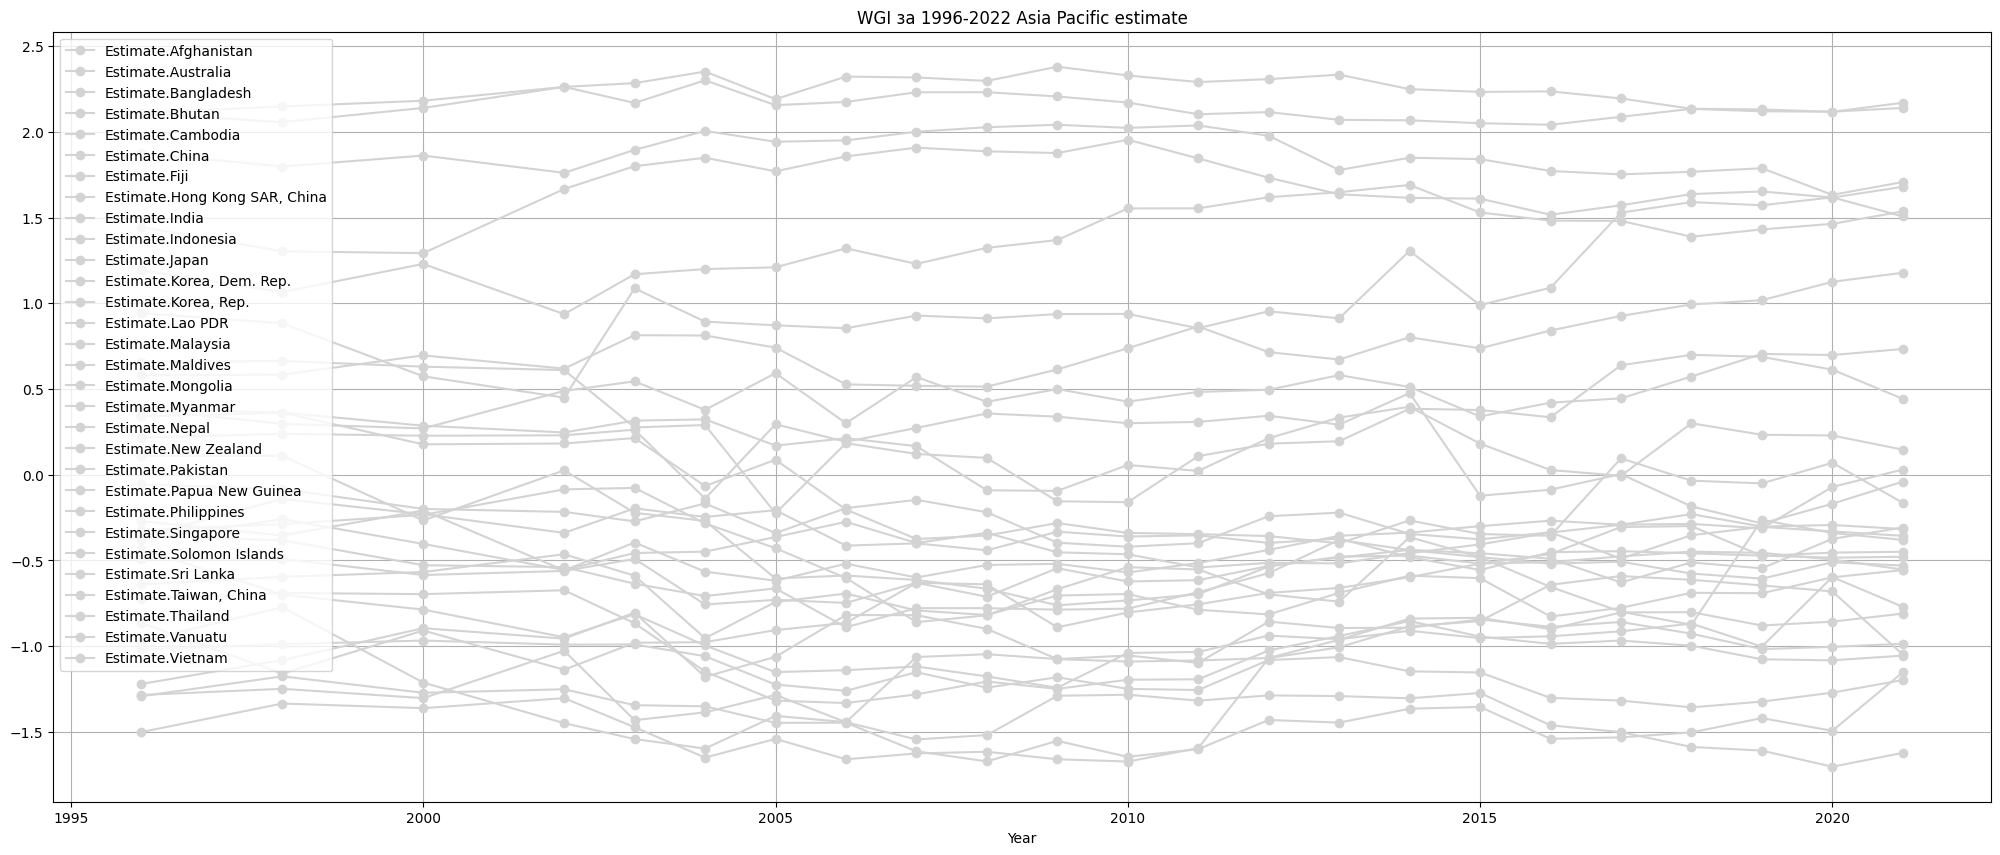

In [163]:
pivoted_df.plot(grid=1,figsize=(25,10),title='WGI за 1996-2022 Asia Pacific estimate',marker='o',color='lightgrey')

## 7. Cтраны с самыми высокими и самыми низкими значениями ГИ в варианте "Азиатско-тихоокеанский регион" на 2021 год (оценка)

In [167]:
# Сохраняйте только строки с 2021 годом
df_2021 = df_1996_2021[df_1996_2021['Year'] == 2021]
# Найдите страну с максимальным PVE
max_pve_country = df_2021.loc[df_2021['Estimate'].idxmax()]['Country/Territory']
# Найдите страну с минимальным количеством PVE
min_pve_country = df_2021.loc[df_2021['Estimate'].idxmin()]['Country/Territory']

In [168]:
#страна с максимальным PVE
max_pve_country

'New Zealand'

In [169]:
#страна с минимальным PVE
min_pve_country

'Korea, Dem. Rep.'

## 8. Средние значения по региону за каждый год с 1996 по 2021 год (оценка)

In [170]:
# Сгруппируйте данные по годам и рассчитайте среднее значение для каждого года
average_values_by_year = df_1996_2021.groupby('Year')['Estimate'].mean().reset_index()

# Filter data from 1996 to 2021
result = average_values_by_year[average_values_by_year['Year'].between(1996, 2021)]

print(result)

    Year  Estimate
0   1996  0.005390
1   1998  0.004409
2   2000 -0.035114
3   2002 -0.043584
4   2003 -0.024761
5   2004 -0.117873
6   2005 -0.141014
7   2006 -0.154418
8   2007 -0.139037
9   2008 -0.156720
10  2009 -0.154840
11  2010 -0.140798
12  2011 -0.131607
13  2012 -0.063054
14  2013 -0.046824
15  2014  0.012366
16  2015 -0.049325
17  2016 -0.073050
18  2017 -0.025685
19  2018 -0.012606
20  2019 -0.013031
21  2020  0.016584
22  2021  0.016733


In [172]:
# среднее значение по региону за год
average_values_by_year.head()

,Year,Estimate
0,1996,0.005390
1,1998,0.004409
2,2000,-0.035114
3,2002,-0.043584
4,2003,-0.024761


## 9. Постройте график индекса WGI за 1996-2021 годы для стран моего региона и выберите страны с самыми высокими и самыми низкими значениями WGI на 2021 год, а также отобразите среднее значение для региона и Российской Федерации.

In [174]:
# Российская Федерация
df_russia = Final_dataset[Final_dataset["Country/Territory"] == "Russian Federation"]
df_russia = df_russia[df_russia['Year'] != 2022]
df_russia = df_russia [["Country/Territory","Year", "Estimate"]]

# DF страна с максимальным PVE
df_max = df_1996_2021[df_1996_2021["Country/Territory"] == max_pve_country]
# DF страна с минимальным PVE
df_min = df_1996_2021[df_1996_2021["Country/Territory"] == min_pve_country]

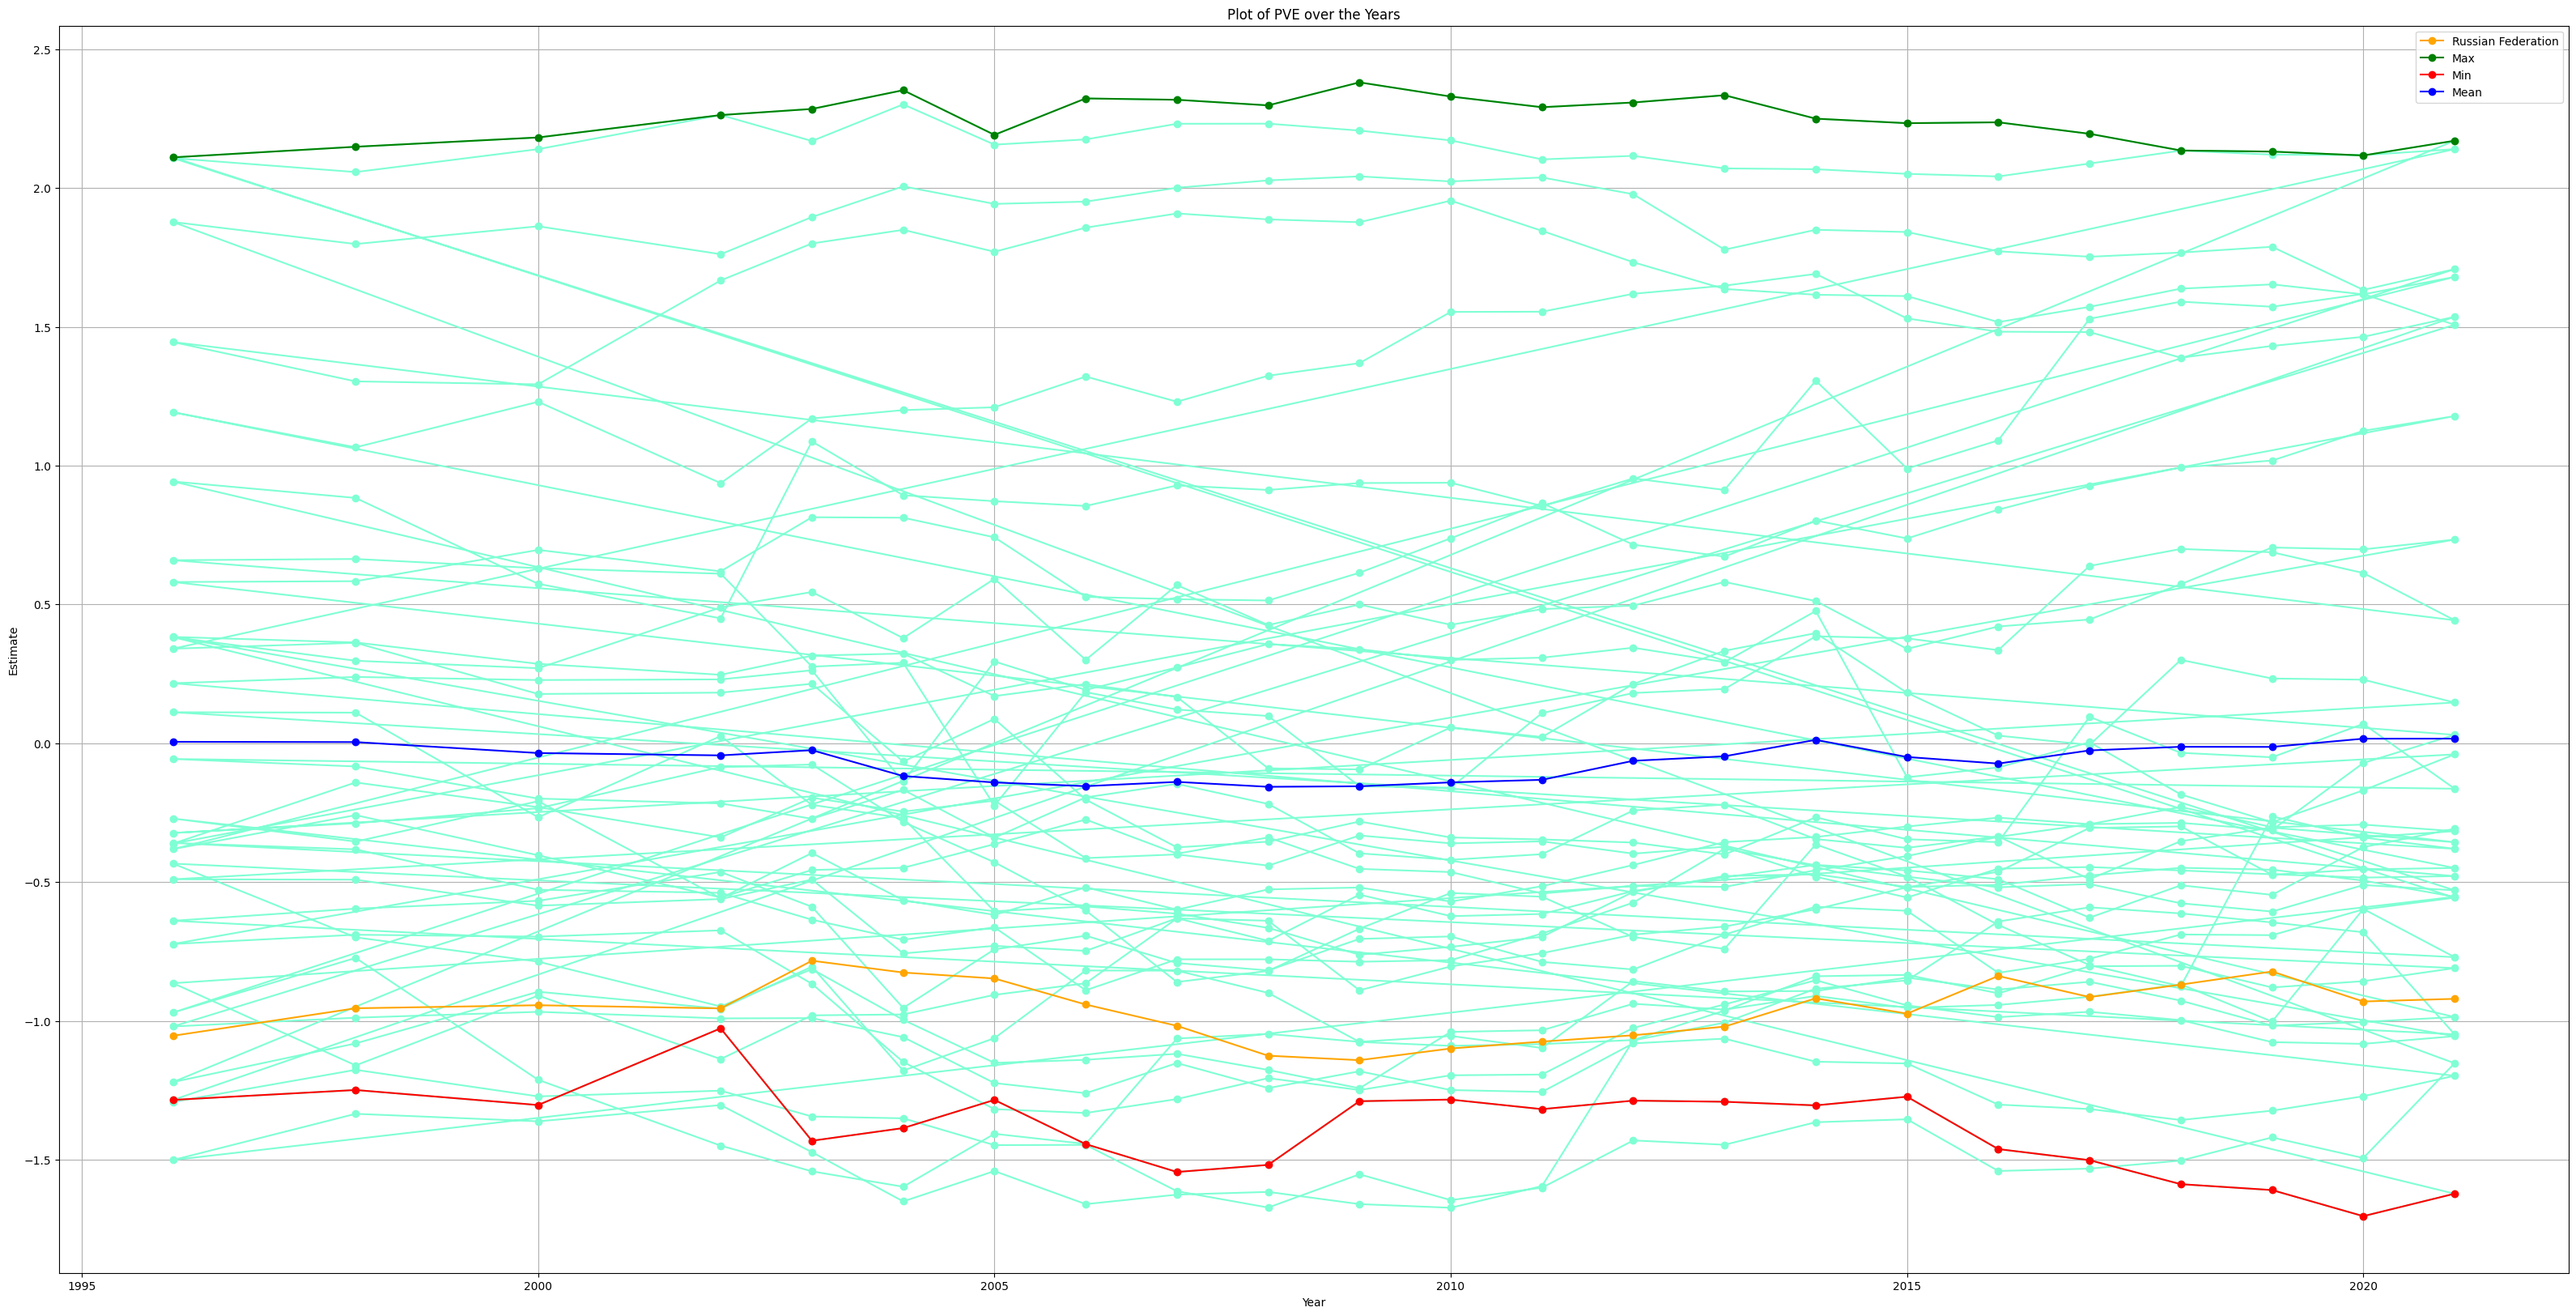

In [177]:
# Plot the graph
plt.figure(figsize=(40, 20))
plt.plot(df_1996_2021['Year'], df_1996_2021['Estimate'], marker='o', linestyle='-',color='aquamarine')
plt.plot(df_russia['Year'], df_russia['Estimate'], marker='o', linestyle='-',color='orange',label='Russian Federation')
plt.plot(df_max['Year'], df_max['Estimate'], marker='o', linestyle='-',color='green',label='Max')
plt.plot(df_min['Year'], df_min['Estimate'], marker='o', linestyle='-',color='red',label='Min')
plt.plot(average_values_by_year['Year'], average_values_by_year['Estimate'], marker='o', linestyle='-',color='blue',label='Mean')
plt.xlabel('Year')
plt.ylabel('Estimate')
plt.title('Plot of PVE over the Years')
plt.grid(True)
plt.legend()
plt.show()

## 11. Изменения значения показателя ранга с 1996 по 2022 год

In [190]:
# create DF from 1996 to 2021 based on rank
df_1996_2021 = df_ap_region[["Country/Territory","Year", "Rank"]]
df_1996_2021_rank = df_1996_2021[df_1996_2021["Year"] != 2022]
df_1996_2021_rank

,Country/Territory,Year,Rank
0,Afghanistan,1996,4.301075
1,Afghanistan,1998,8.021390
2,Afghanistan,2000,4.787234
3,Afghanistan,2002,4.761905
4,Afghanistan,2003,4.761905
...,...,...,...
4170,Vietnam,2017,30.476191
4171,Vietnam,2018,35.238094
4172,Vietnam,2019,32.857143
4173,Vietnam,2020,41.428570


In [191]:
#Название страны' - это имя столбца, содержащего названия стран в вашем наборе данных
unique_countries = Final_dataset['Country/Territory'].unique().tolist()
# Инициализировать пустые списки для хранения элементов
percentage_change = []

for country in unique_countries:
  # Рассчитайте процентное изменение
  final_wgi = Final_dataset.loc[(Final_dataset['Country/Territory'] == country) & (Final_dataset['Year'] == 2022), 'Rank'].values
  initial_wgi =  Final_dataset.loc[(Final_dataset['Country/Territory'] == country) & (Final_dataset['Year'] == 1996), 'Rank'].values
  percentage_change.append(final_wgi - initial_wgi)

# Создайте фрейм данных из списков
Changes = pd.DataFrame({'Country': unique_countries, 'Changes': percentage_change})


In [192]:
Changes.head()

,Country,Changes
0,Aruba,[nan]
1,Andorra,[1.5824737548828125]
2,Afghanistan,[7.963075160980225]
3,Angola,[20.98295783996582]
4,Anguilla,[nan]


## Tаблица для (WGI - рейтинг)

In [193]:
# Сохраните только 2021 год
df_2021_rank = df_ap_region[df_ap_region["Year"] == 2021]

# Рассчитайте среднее значение для WGI в 2021 году
df_2021_rank_mean = df_2021_rank['Rank'].mean()

# Сохраните только 1996 год
df_1996_rank = df_ap_region[df_ap_region["Year"] == 1996]

# Рассчитайте среднее значение для WGI за 1996 год
df_1996_rank_mean = df_1996_rank['Rank'].mean()

# Рассчитайте процентное изменение среднего значения в период с 2021 по 1996 год
changes_mean = (df_2021_rank_mean - df_1996_rank_mean)

# Рассчитайте минимум и максимум для WGI в 2021 году
# Найдите страну с максимальным значением Rank
max_value_country = df_2021_rank.loc[df_2021_rank['Rank'] == df_2021_rank['Rank'].max(), 'Country/Territory'].values[0]
max_value = df_2021_rank.loc[df_2021_rank['Rank'] == df_2021_rank['Rank'].max(), 'Rank'].values[0]

# Найдите страну с минимальным значением Rank
min_value_country = df_2021_rank.loc[df_2021_rank['Rank'] == df_2021_rank['Rank'].min(), 'Country/Territory'].values[0]
min_value = df_2021_rank.loc[df_2021_rank['Rank'] == df_2021_rank['Rank'].min(), 'Rank'].values[0]

# Российская Федерация
df_russia = Final_dataset[Final_dataset["Country/Territory"] == "Russian Federation"]
df_russia_2021 = df_russia[df_russia['Year'] == 2021]



In [194]:
# Рассчитайте минимум и максимум для WGI в 2021 году
# Найдите страну с максимальным значением var
max_value_1996 = df_1996_rank.loc[df_1996_rank['Country/Territory'] == max_value_country, 'Rank'].values[0]

# Найдите страну с минимальным значением var
min_value_1996 = df_1996_rank.loc[df_1996_rank['Country/Territory'] == min_value_country, 'Rank'].values[0]
# Российская Федерация, 1996
df_russia_1996 = df_russia[df_russia['Year'] == 1996]


In [195]:
# Извлечь максимальную область
max_region = regions.loc[regions['Country'] == max_value_country, 'Region'].values[0]
# Извлечь минимальный регион
min_region = regions.loc[regions['Country'] == "Korea, North", 'Region'].values[0]
# Извлечь российский регион
russian_region = regions.loc[regions['Country'] == "Russia", 'Region'].values[0]

In [196]:
# Извлечь изменения максимальной области
max_region_changes = Changes.loc[Changes['Country'] == max_value_country, 'Changes'].values[0]
# Извлечь изменения минимальной области
min_region_changes = Changes.loc[Changes['Country'] == "Korea, Dem. Rep.", 'Changes'].values[0]
# Выписка изменяет регион России
russian_region_changes = Changes.loc[Changes['Country'] == "Russian Federation", 'Changes'].values[0]

In [197]:
import pandas as pd

# Создайте списки словарей для каждого столбца
data = {
          '' : ['Mean', 'Max', 'Min', 'Russia'],
    'Region' : ['AP', max_region, min_region, russian_region],
    'Country': ['-',max_value_country ,min_value_country , "Russian Federation"],
    'Rank 2021': [df_2021_rank_mean, max_value, min_value,df_russia_2021['Rank'].values[0] ],
    'Rank 1996': [df_1996_rank_mean,max_value_1996 , min_value_1996, df_russia_1996['Rank'].values[0]],
    'Changes': [changes_mean, max_region_changes, min_region_changes,russian_region_changes ]
}

# # Создайте фрейм данных из словаря
table = pd.DataFrame(data)
# Заполните таблицу результатами
table

,,Region,Country,Rank 2021,Rank 1996,Changes
0,Mean,AP,-,49.412698,50.197133,-0.784435
1,Max,AP,New Zealand,99.047623,97.849464,[1.2071380615234375]
2,Min,AP,"Korea, Dem. Rep.",2.380952,4.838710,[-2.4802193641662598]
3,Russia,ECA,Russian Federation,19.523809,15.053763,[4.285859107971191]


## 13. Отобразите диаграмму размаха (boxplot) индекса WGI за 2021 для всех стран и для каждого региона в отдельности (на одном графике) (estimate)

In [144]:
# Получите уникальные регионы
unique_regions = regions['Region'].unique()

# Создайте словарь для хранения фреймов данных для каждого региона
region_dfs = {}

# Разделить фрейм данных по регионам
for region in unique_regions:
    region_dfs[region] = regions[regions['Region'] == region].reset_index(drop=True)

In [179]:
# Создайте пустой словарь для хранения фреймов данных каждого региона
DataFrames = {}

df_2021 = Final_dataset[Final_dataset["Year"] == 2022]
df_2021_estimate = df_2021[['Country/Territory','Estimate']]
df_2021_estimate.rename(columns={'Country/Territory': 'Country'}, inplace=True)

for region, region_df in region_dfs.items():
# Создайте имя переменной на основе индекса
  DataFrames[region] = pd.merge(region_dfs[region], df_2021_estimate, on='Country', how='left')


<ipython-input-179-d40597edfd8f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_estimate.rename(columns={'Country/Territory': 'Country'}, inplace=True)


<Figure size 1500x700 with 0 Axes>

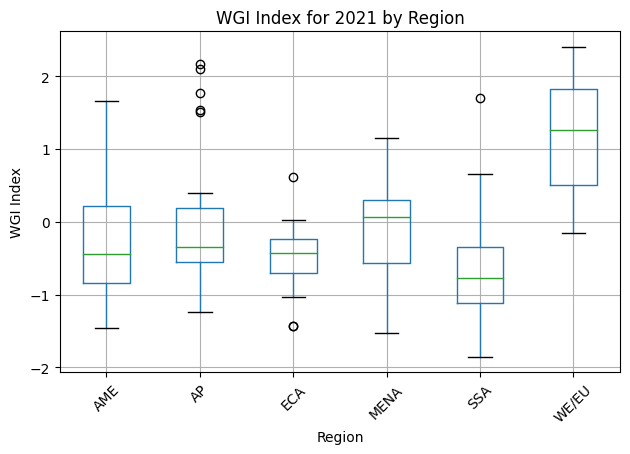

In [180]:
# Combine all DataFrames into one
df = pd.concat(DataFrames.values())
df
# Plot boxplot
plt.figure(figsize=(15, 7))
boxplot = df.boxplot(column='Estimate', by='Region')
plt.title('WGI Index for 2022 by Region')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('WGI Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Задача 2. Анализ рынка акций

## Загрузите данные в один dataframe

In [ ]:
import os
import pandas as pd

# Путь к загруженному каталогу, содержащему CSV-файлы
folder_path = '/content/stock'

# Инициализируйте пустой фрейм данных для хранения данных
combined_df = pd.DataFrame()

# Выполнить итерацию по каждому файлу в каталоге
for file_name in os.listdir(folder_path):
    # Проверьте, является ли файл CSV-файлом
    if file_name.endswith('.csv'):
        # Считайте CSV-файл во фрейм данных
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        # Извлеките название рекламной акции из имени файла
        promotion_name = os.path.splitext(file_name)[0]

        # Извлеките столбцы "Дата" и "Закрыть" и установите "Дату" в качестве индекса
        df = df[['Date', 'Close']].set_index('Date')

        # Переименуйте столбец "Закрыть" в название акции
        df.rename(columns={'Close': promotion_name}, inplace=True)

        # Объедините текущий фрейм данных с объединенным фреймом данных
        combined_df = pd.concat([combined_df, df], axis=1)

# Отображение объединенного фрейма данных
combined_df


,XIACY,NVDA,AMZN,MSFT,SPOT,ORCL,PINS,GOOGL,EBAY,AAPL,...,SHOP,META,DBX,NFLX,CSCO,GTLB,MU,UBER,ABNB,HPQ
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,10.7350,244.860001,149.573502,310.980011,196.259995,81.160004,29.559999,135.303497,60.070000,174.779999,...,NaN,313.260010,24.750000,427.140015,55.669998,64.010002,82.269997,37.400002,153.970001,36.730000
2022-02-01,9.5500,243.850006,153.563004,298.790009,156.190002,75.970001,26.750000,135.057007,54.590000,165.119995,...,NaN,211.029999,22.690001,394.519989,55.770000,58.270000,88.860001,36.029999,151.490005,34.360001
2022-03-01,8.7199,272.859985,162.997498,308.309998,151.020004,82.730003,24.610001,139.067505,57.259998,174.610001,...,NaN,222.360001,23.250000,374.589996,55.759998,54.450001,77.889999,35.680000,171.759995,36.299999
2022-04-01,7.5400,185.470001,124.281502,277.519989,101.650002,73.400002,20.520000,114.109497,51.919998,157.649994,...,NaN,200.470001,21.750000,190.360001,48.980000,47.930000,68.190002,31.480000,153.210007,36.630001
2022-05-01,7.6300,186.720001,120.209503,271.869995,112.769997,71.919998,19.650000,113.762001,48.669998,148.839996,...,NaN,193.639999,20.840000,197.440002,45.049999,38.939999,73.839996,23.200001,120.870003,38.840000
2022-06-01,8.6300,151.589996,106.209999,256.829987,93.830002,69.870003,18.160000,108.962997,41.669998,136.720001,...,NaN,161.250000,20.990000,174.869995,42.639999,53.139999,55.279999,20.459999,89.080002,32.779999
2022-07-01,7.8900,181.630005,134.949997,280.739990,113.019997,77.839996,19.480000,116.320000,48.630001,162.509995,...,NaN,159.100006,22.740000,224.899994,45.369999,57.400002,61.860001,23.450001,110.980003,33.389999
2022-08-01,7.1900,150.940002,126.769997,261.470001,108.150002,74.150002,23.040001,108.220001,44.130001,157.220001,...,NaN,162.929993,21.389999,223.559998,44.720001,59.869999,56.529999,28.760000,113.120003,28.709999
2022-09-01,5.5800,121.389999,113.000000,232.899994,86.300003,61.070000,23.299999,95.650002,36.810001,138.199997,...,NaN,135.679993,20.719999,235.440002,40.000000,51.220001,50.099998,26.500000,105.040001,24.920000


## Вычисление корреляционной матрицы для всех акций

In [ ]:
# Вычислить корреляционную матрицу
correlation_matrix = combined_df.corr()

# Отобразить корреляционную матрицу
print(correlation_matrix)


          XIACY      NVDA      AMZN      MSFT      SPOT      ORCL      PINS  \
XIACY  1.000000  0.445645  0.654564  0.565831  0.647331  0.324511  0.524413   
NVDA   0.445645  1.000000  0.765294  0.935386  0.925270  0.875089  0.815629   
AMZN   0.654564  0.765294  1.000000  0.838702  0.875779  0.534556  0.666996   
MSFT   0.565831  0.935386  0.838702  1.000000  0.949380  0.847046  0.837576   
SPOT   0.647331  0.925270  0.875779  0.949380  1.000000  0.763100  0.842858   
ORCL   0.324511  0.875089  0.534556  0.847046  0.763100  1.000000  0.747754   
PINS   0.524413  0.815629  0.666996  0.837576  0.842858  0.747754  1.000000   
GOOGL  0.680658  0.715287  0.912332  0.845993  0.821587  0.618983  0.640675   
EBAY   0.535223  0.087027  0.434078  0.127010  0.296858 -0.070414 -0.002757   
AAPL   0.408747  0.633114  0.665715  0.790691  0.687415  0.769309  0.640294   
TWLO   0.447846 -0.244797  0.314869 -0.094023  0.059969 -0.393536 -0.141953   
TSLA   0.184629 -0.277600  0.302321 -0.117639 -0.092

## Отобразите корреляционную матрицу в виде диаграммы.

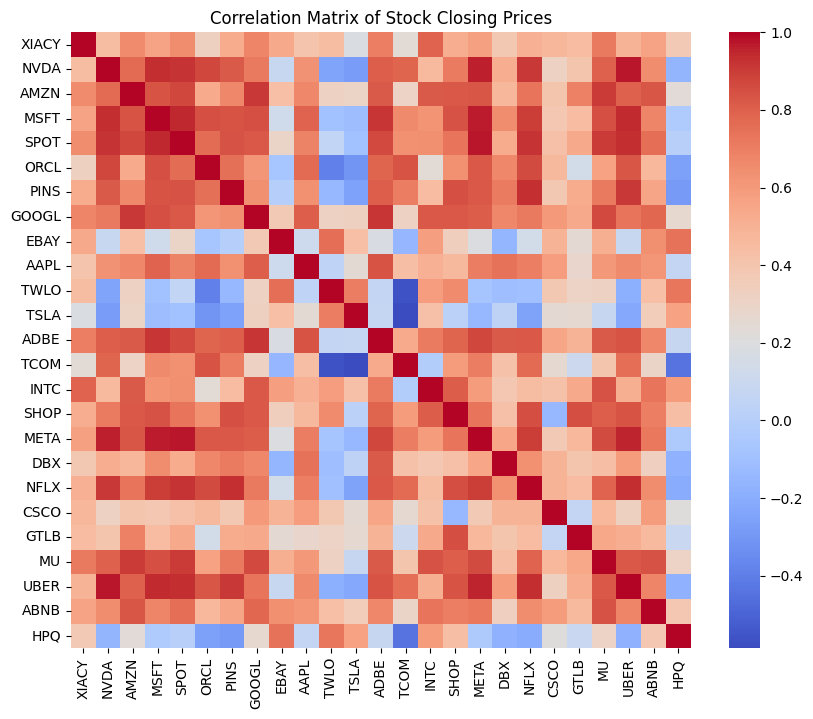

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Closing Prices')
plt.show()

## акцию с максимальной положительной корреляцией (max)



In [ ]:
# Отфильтруйте корреляционную матрицу, чтобы включить только корреляции с Alibaba (BABA)
Uber_correlation = correlation_matrix['UBER'].drop('UBER')  # Откажитесь от самокорреляции с Uber
# Найдите долю с максимальной положительной корреляцией
max_positive_correlation_stock = Uber_correlation.idxmax()

print("Share with the maximum positive correlation with Alibaba (Uber):", max_positive_correlation_stock)


Share with the maximum positive correlation with Alibaba (Uber): NVDA


## акцию с максимальной отрицательной корреляцией (min)

In [ ]:
# Найдите долю с максимальной отрицательной корреляцией
max_negative_correlation_stock = Uber_correlation.idxmin()

print("Share with the maximum negative correlation with Uber (Uber):", max_negative_correlation_stock)

Share with the maximum negative correlation with Uber (Uber): TSLA


## акцию с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none)

In [ ]:
# Найдите долю с минимальной корреляцией (ближайшей к нулю)
min_correlation_stock = Uber_correlation.abs().idxmin()

print("Share with the minimum correlation (closest to zero) with Uber (Uber):", min_correlation_stock)

Share with the minimum correlation (closest to zero) with Uber (Uber): EBAY


## Постройте диаграммы разброса (Ваша компания - Компания с min), (Ваша компания - Компания с max), (Ваша компания - Компания с none)

In [ ]:
# Извлеките цены закрытия Uber (UBER) и выбранных компаний
baba_prices = combined_df['UBER']
max_positive_correlation_prices = combined_df[max_positive_correlation_stock]
max_negative_correlation_prices = combined_df[max_negative_correlation_stock]
min_correlation_prices = combined_df[min_correlation_stock]


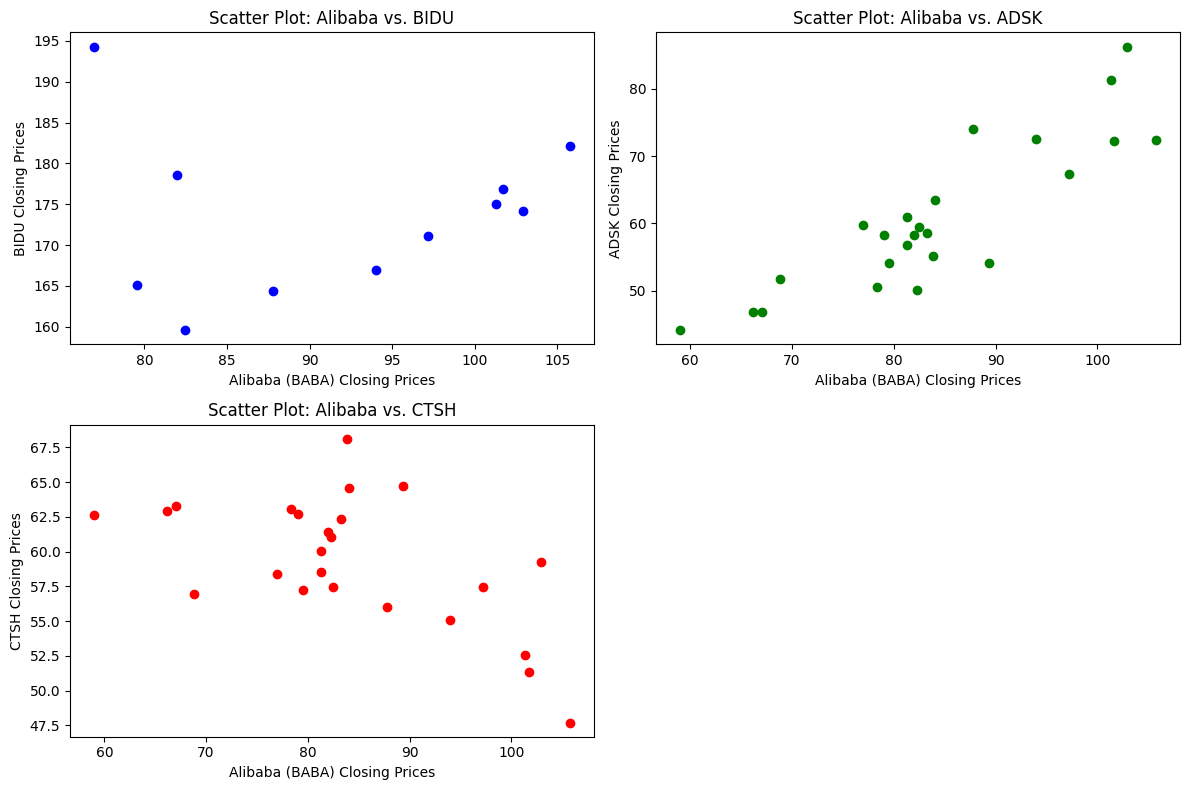

In [ ]:
# Создание точечных диаграмм
plt.figure(figsize=(12, 8))

# Точечный график для компании с минимальной корреляцией (ближайшей к нулю)
plt.subplot(2, 2, 1)
plt.scatter(baba_prices, min_correlation_prices, color='blue')
plt.title('Scatter Plot: Uber vs. ' + min_correlation_stock)
plt.xlabel('Uber (UBER) Closing Prices')
plt.ylabel(min_correlation_stock + ' Closing Prices')

# Точечный график для компании с максимальной положительной корреляцией
plt.subplot(2, 2, 2)
plt.scatter(baba_prices, max_positive_correlation_prices, color='green')
plt.title('Scatter Plot: Uber vs. ' + max_positive_correlation_stock)
plt.xlabel('Uber (UBER) Closing Prices')
plt.ylabel(max_positive_correlation_stock + ' Closing Prices')

# Точечный график для компании с максимальной отрицательной корреляцией
plt.subplot(2, 2, 3)
plt.scatter(baba_prices, max_negative_correlation_prices, color='red')
plt.title('Scatter Plot: Uber vs. ' + max_negative_correlation_stock)
plt.xlabel('Uber (UBER) Closing Prices')
plt.ylabel(max_negative_correlation_stock + ' Closing Prices')
plt.tight_layout()
plt.show()

## Рассчитайте среднюю цену акций для каждого месяца (исходные данные взяты с интервалом в месяц)

In [ ]:
# Преобразуйте индекс в datetime, если он еще не в формате datetime
combined_df.index = pd.to_datetime(combined_df.index)

# # Повторите выборку фрейма данных с месячными интервалами и вычислите среднее значение
monthly_avg_prices = combined_df.resample('M').mean()

# Отображение средних цен на акции за каждый месяц
print(monthly_avg_prices)


              XIACY        NVDA        AMZN        MSFT        SPOT  \
Date                                                                  
2022-01-31  10.7350  244.860001  149.573502  310.980011  196.259995   
2022-02-28   9.5500  243.850006  153.563004  298.790009  156.190002   
2022-03-31   8.7199  272.859985  162.997498  308.309998  151.020004   
2022-04-30   7.5400  185.470001  124.281502  277.519989  101.650002   
2022-05-31   7.6300  186.720001  120.209503  271.869995  112.769997   
2022-06-30   8.6300  151.589996  106.209999  256.829987   93.830002   
2022-07-31   7.8900  181.630005  134.949997  280.739990  113.019997   
2022-08-31   7.1900  150.940002  126.769997  261.470001  108.150002   
2022-09-30   5.5800  121.389999  113.000000  232.899994   86.300003   
2022-10-31   5.6300  134.970001  102.440002  232.130005   80.580002   
2022-11-30   6.7800  169.229996   96.540001  255.139999   79.419998   
2022-12-31   6.8750  146.139999   84.000000  239.820007   78.949997   
2023-0

## Постройте графики для акций из пункта 4 и средней из пункта 6.

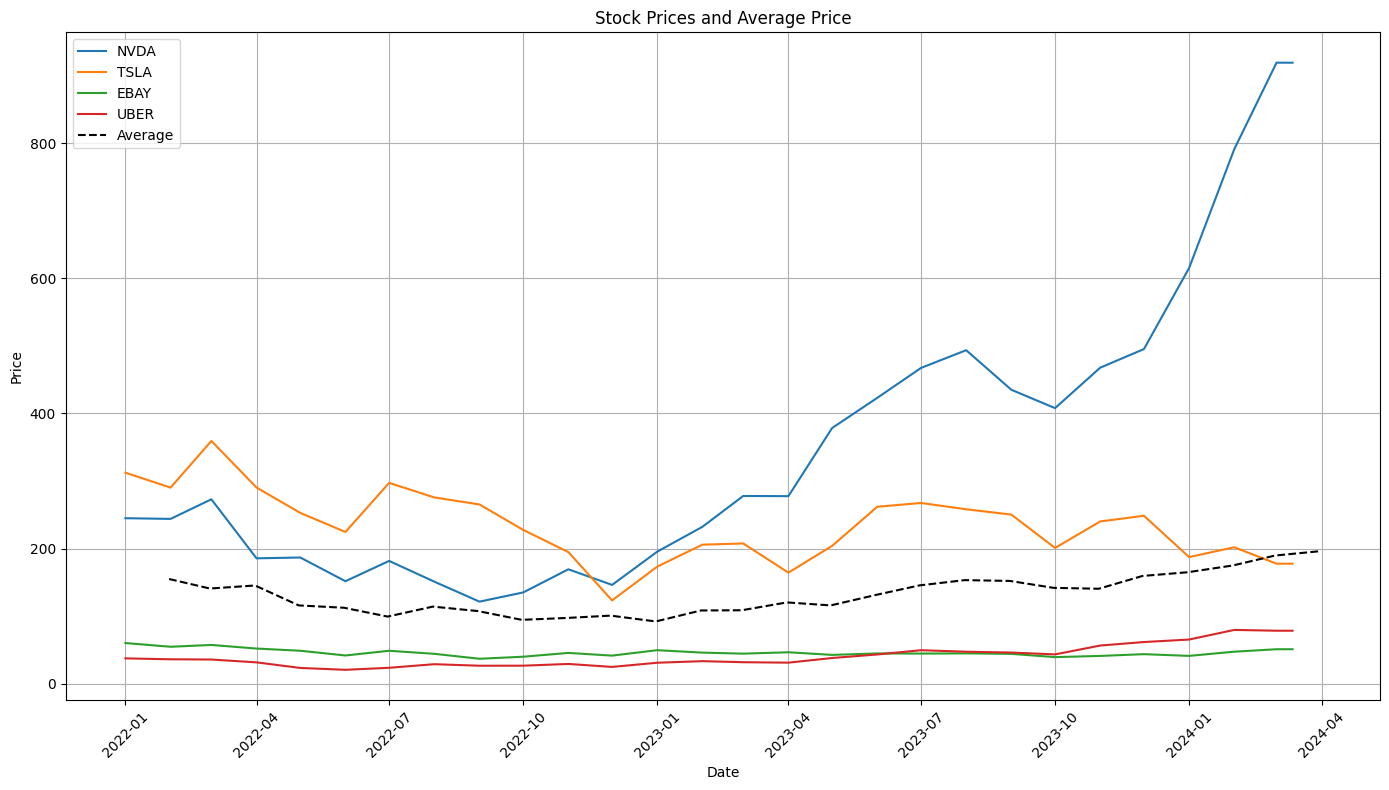

In [ ]:
import matplotlib.pyplot as plt

# Построение графика цен на отдельные акции и средних цен на акции за каждый месяц
plt.figure(figsize=(14, 8))

# Построение графиков цен на отдельные акции
for stock in [max_positive_correlation_stock, max_negative_correlation_stock, min_correlation_stock,"UBER"]:
    plt.plot(combined_df.index, combined_df[stock], label=stock)

# Построить график средних цен на акции за каждый месяц
plt.plot(monthly_avg_prices.index, monthly_avg_prices.mean(axis=1), color='black', linestyle='--', label='Average')

# Добавить метки и заголовок
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices and Average Price')
plt.legend()
plt.grid(True)

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
